In [7]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Importing Dataset
dataset = pd.read_csv(r"C:\Users\Honey\Downloads\Healthcare-Diabetes.csv")
dataset

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [10]:
dataset.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
dataset.fillna(0,inplace=True)

In [12]:
dataset.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
dataset.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


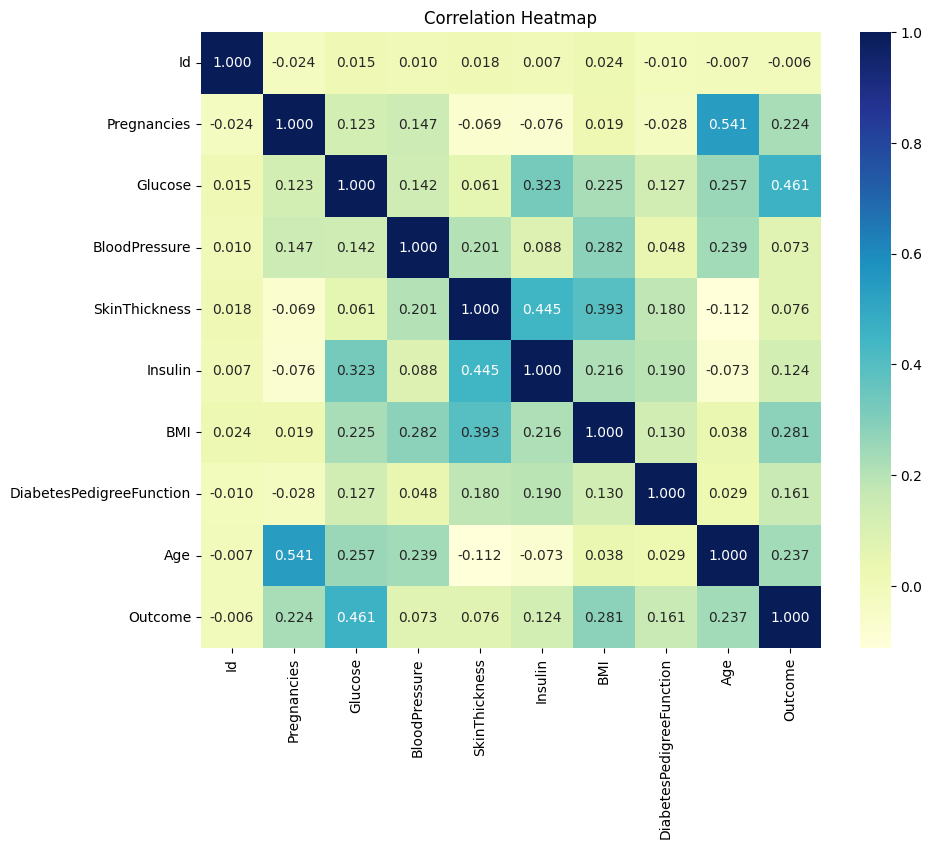

In [14]:
#Correlation plot of independent variables
numeric_data = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Honey\AppData\Local\Temp\ipykernel_58020\2292833494.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1], color = "Blue", shade=True)
C:\Users\Honey\AppData\Local\Temp\ipykernel_58020\2292833494.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0], color = "Green", shade=True)


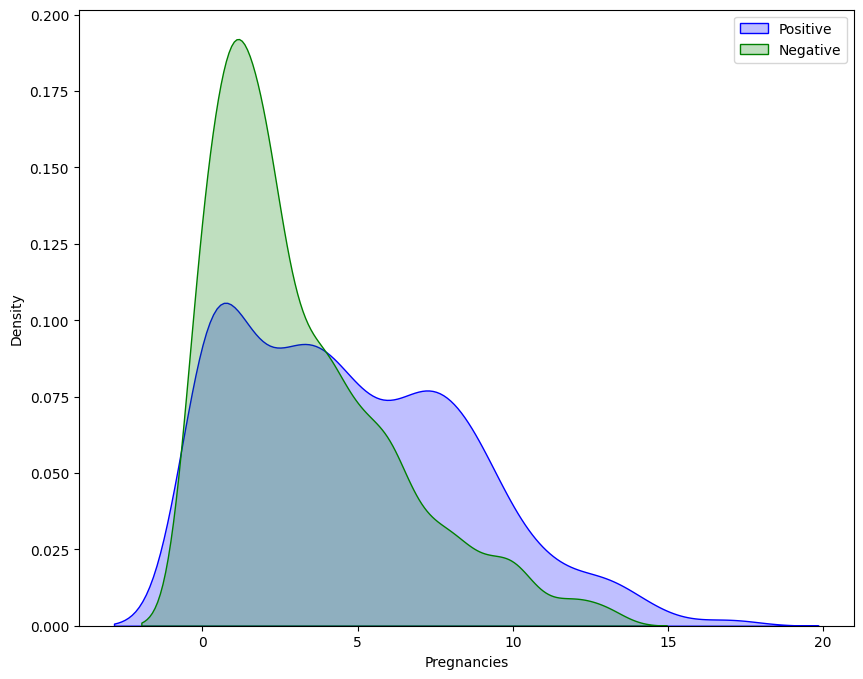

In [15]:
#Exploring Pregnancies and target variables
plt.figure(figsize  =(10,8))
#Plotting density function graph of the Pregnancies and target variables
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1], color = "Blue", shade=True)
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0], color = "Green", shade=True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

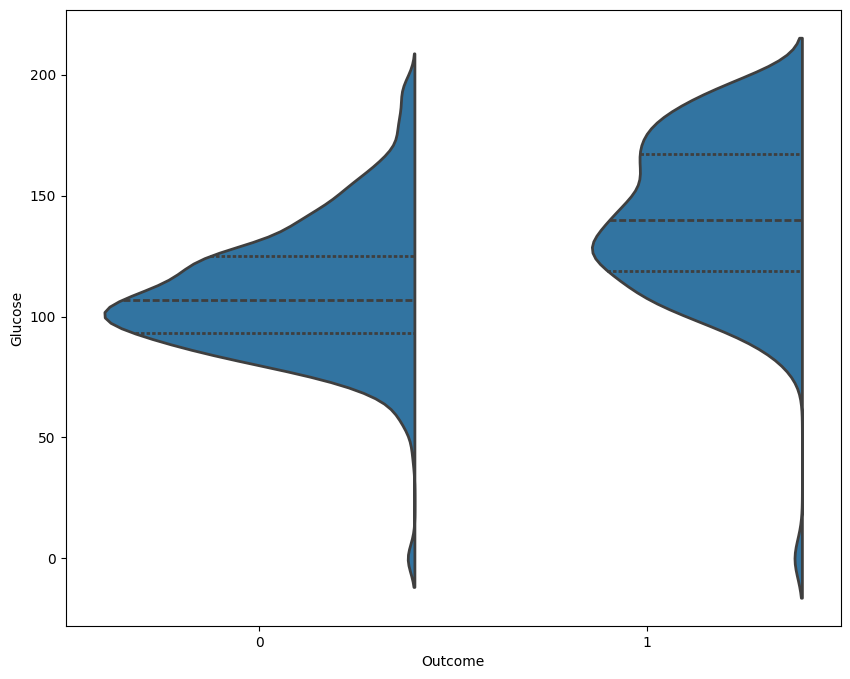

In [16]:
#Exploring Glucose and target variables
plt.figure(figsize  =(10,8))
sns.violinplot(data=dataset,x="Outcome",y="Glucose",split =True, linewidth=2,inner ="quart")

C:\Users\Honey\AppData\Local\Temp\ipykernel_58020\137545145.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1], color = "Blue", shade=True)
C:\Users\Honey\AppData\Local\Temp\ipykernel_58020\137545145.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0], color = "Green", shade=True)


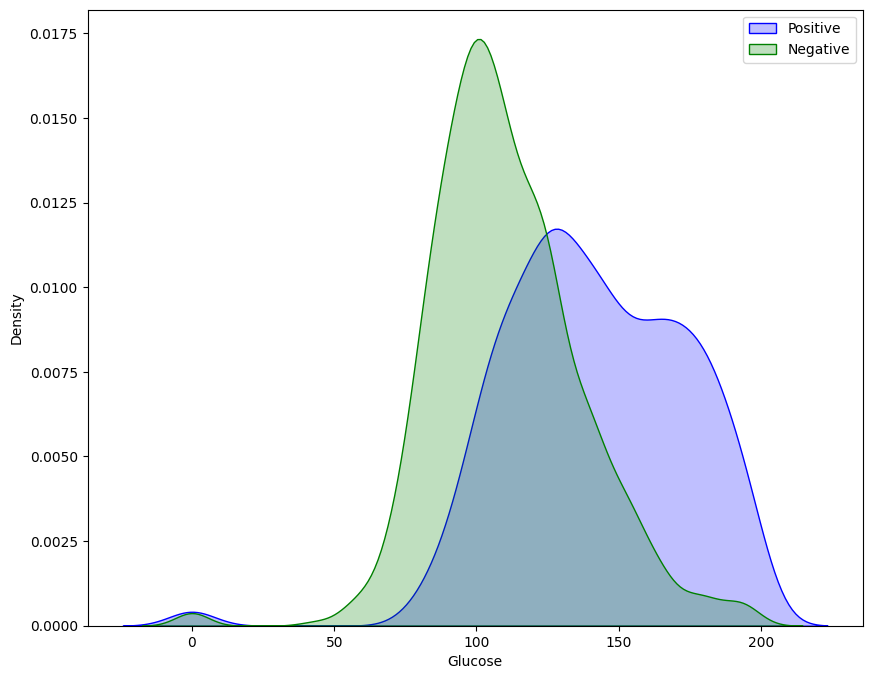

In [17]:
#Exploring Glucose and target variables
plt.figure(figsize  =(10,8))
#Plotting density function graph of the Glucose and target variables
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1], color = "Blue", shade=True)
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0], color = "Green", shade=True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

In [18]:
#Replace 0 values with mean/median of the respective feature
#Glucose
dataset["Glucose"] = dataset["Glucose"].replace(0,dataset["Glucose"].median())
#BloodPressure
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0,dataset["BloodPressure"].median())
#BMI
dataset["BMI"] = dataset["BMI"].replace(0,dataset["BMI"].mean())
#SkinThickness
dataset.columns = dataset.columns.str.strip()
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0, dataset["SkinThickness"].mean())
#Insulin
dataset["Insulin"] = dataset["Insulin"].replace(0,dataset["Insulin"].mean())

In [19]:
dataset

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35.000000,80.12789,33.6,0.627,50,1
1,2,1,85,66,29.000000,80.12789,26.6,0.351,31,0
2,3,8,183,64,20.824422,80.12789,23.3,0.672,32,1
3,4,1,89,66,23.000000,94.00000,28.1,0.167,21,0
4,5,0,137,40,35.000000,168.00000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24.000000,55.00000,29.7,0.370,33,0
2764,2765,8,179,72,42.000000,130.00000,32.7,0.719,36,1
2765,2766,6,85,78,20.824422,80.12789,31.2,0.382,42,0
2766,2767,0,129,110,46.000000,130.00000,67.1,0.319,26,1


In [20]:
#Splitting the dependent and independent variables
x=dataset.drop(["Outcome"], axis = 1)
y=dataset["Outcome"]

In [21]:
x

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,6,148,72,35.000000,80.12789,33.6,0.627,50
1,2,1,85,66,29.000000,80.12789,26.6,0.351,31
2,3,8,183,64,20.824422,80.12789,23.3,0.672,32
3,4,1,89,66,23.000000,94.00000,28.1,0.167,21
4,5,0,137,40,35.000000,168.00000,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24.000000,55.00000,29.7,0.370,33
2764,2765,8,179,72,42.000000,130.00000,32.7,0.719,36
2765,2766,6,85,78,20.824422,80.12789,31.2,0.382,42
2766,2767,0,129,110,46.000000,130.00000,67.1,0.319,26


In [22]:
y

0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64

In [23]:
#Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split

In [3]:
pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
    --------------------------------------- 0.5/41.0 MB 2.9 MB/s eta 0:00:14
    --------------------------------------- 0.5/41.0 MB 2.9 MB/s eta 0:00:14
   - -------------------------------------- 1.6/41.0 MB 2.7 MB/s eta 0:00:15
   -- ------------------------------------- 2.1/41.0 MB 2.6 MB/s eta 0:00:15
   -- ------------------------------------- 2.6/41.0 MB 2.5 MB/s eta 0:00:16
   -- ------------------------------------- 2.9/41.0 MB 2.4 MB/s eta 0:00:17
   --- ------------------------------------ 3.4/41.0 MB 2.3 MB/s eta

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=62)

In [25]:
x_train

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1455,1456,1,107,50,19.000000,80.12789,28.3,0.181,29
1205,1206,5,147,75,20.824422,80.12789,29.9,0.434,28
829,830,8,133,72,20.824422,80.12789,32.9,0.270,39
134,135,2,96,68,13.000000,49.00000,21.1,0.647,26
1377,1378,1,111,62,13.000000,182.00000,24.0,0.138,23
...,...,...,...,...,...,...,...,...,...
17,18,7,107,74,20.824422,80.12789,29.6,0.254,31
1082,1083,7,109,80,31.000000,80.12789,35.9,1.127,43
2163,2164,0,179,90,27.000000,80.12789,44.1,0.686,23
1617,1618,0,93,100,39.000000,72.00000,43.4,1.021,35


In [26]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [30]:
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train,y_train)

    #check accuracy score
    training_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

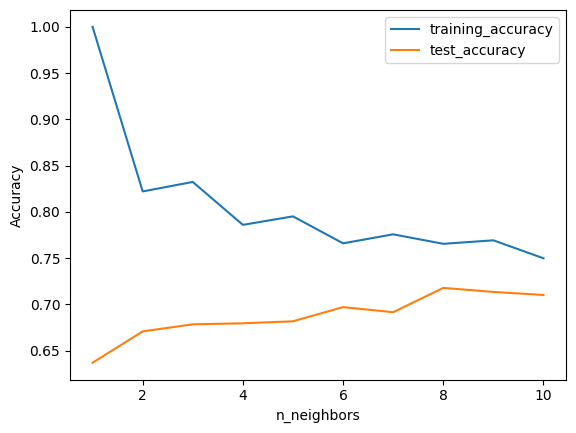

In [31]:
plt.plot(range(1,11),training_accuracy,label = "training_accuracy")
plt.plot(range(1,11),test_accuracy,label = "test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [35]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train),":Training accuracy")
print(knn.score(x_test,y_test),":Test accuracy")

0.749730312837109 :Training accuracy
0.7100656455142232 :Test accuracy


In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train),":Training accuracy")
print(dt.score(x_test,y_test),":Test accuracy")


1.0 :Training accuracy
0.9595185995623632 :Test accuracy


In [38]:
dt1= DecisionTreeClassifier(random_state=0, max_depth=6)
dt1.fit(x_train,y_train)
print(dt1.score(x_train,y_train),":Training accuracy")
print(dt1.score(x_test,y_test),":Test accuracy")


0.8689320388349514 :Training accuracy
0.7932166301969366 :Test accuracy
